In [59]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import time
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc,confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold
import tensorflow as tf

from tensorflow import keras
from keras import regularizers
from keras.utils.np_utils import to_categorical
from tensorflow.keras import layers
from sklearn.pipeline import Pipeline
%matplotlib  inline

In [60]:
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
print(tf.__version__)
print(tf.keras.__version__)
print(sklearn.__version__)

1.9.0
2.1.6-tf
0.20.3


In [61]:
path =os.getcwd()

In [62]:
df =pd.read_csv(path +'/Kickstarter/cleaned_kick_data01.csv')

In [63]:
df.shape

(85233, 17)

In [64]:
df.head()

,backers_count,category,country,created_at,currency,deadline,fx_rate,goal,location,pledged,staff_pick,status,duration,created_day,continent,city,state
0,0,film,GB,2017-01-11,GBP,2017-02-15,1.261110,40000.0,"London, UK",0.0,False,failed,35,11,Europe,London,UK
1,12,crafts,CA,2016-02-28,CAD,2016-03-29,0.748587,5000.0,"London, Canada",357.0,False,failed,30,28,America,London,Canada
2,1,games,AU,2016-02-13,AUD,2016-03-19,0.722499,5000.0,"Perth, AU",1.0,False,failed,35,13,Oceania,Perth,AU
3,3,fashion,US,2015-05-25,USD,2015-07-01,1.000000,1900.0,"Austin, TX",49.0,False,failed,37,25,America,Austin,TX
4,2,film,US,2018-05-18,USD,2018-06-17,1.000000,30000.0,"Los Angeles, CA",2.0,False,failed,30,18,America,Los Angeles,CA


In [65]:
df['goal'] =np.log10(df.goal)

In [66]:
#对标称属性进行独热编码，转化为数值属性
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
oh =OneHotEncoder()
df['backers_count'] =le.fit_transform(df['backers_count'].values)
df['category'] =le.fit_transform(df['category'].values)
df['country'] =le.fit_transform(df['country'].values)
df['pledged'] =le.fit_transform(df['pledged'].values)
# df['spotlight'] =le.fit_transform(df['spotlight'].values)
df['staff_pick'] =le.fit_transform(df['staff_pick'].values)
df['duration'] =le.fit_transform(df['duration'].values)
df['continent'] =le.fit_transform(df['continent'].values)
df['city'] =le.fit_transform(df['city'].values)
df['state'] =le.fit_transform(df['state'].values)
df['currency'] =le.fit_transform(df['currency'].values)

In [67]:
#对类别信息进行处理
df['continent'] = to_categorical(df['continent']) 
df['category'] =to_categorical(df['category'])
df['country'] =to_categorical(df['country'])
df['city'] =to_categorical(df['city'])
df['state'] =to_categorical(df['state'])
df['currency'] =to_categorical(df['currency'])

In [68]:
df['status'] =df.status.str.contains('successful').astype(int)

In [69]:
df.head()

,backers_count,category,country,created_at,currency,deadline,fx_rate,goal,location,pledged,staff_pick,status,duration,created_day,continent,city,state
0,0,0.0,0.0,2017-01-11,0.0,2017-02-15,1.261110,4.602060,"London, UK",0,0,0,34,11,0.0,0.0,0.0
1,12,0.0,0.0,2016-02-28,0.0,2016-03-29,0.748587,3.698970,"London, Canada",717,0,0,29,28,1.0,0.0,0.0
2,1,0.0,0.0,2016-02-13,1.0,2016-03-19,0.722499,3.698970,"Perth, AU",1,0,0,34,13,0.0,0.0,0.0
3,3,0.0,0.0,2015-05-25,0.0,2015-07-01,1.000000,3.278754,"Austin, TX",166,0,0,36,25,1.0,0.0,0.0
4,2,0.0,0.0,2018-05-18,0.0,2018-06-17,1.000000,4.477121,"Los Angeles, CA",7,0,0,29,18,1.0,0.0,0.0


In [70]:
# X =df.drop(columns=['backers_count', 'created_at', 'deadline', 'location', 'status'], axis=1)
X =df[['goal', 'category', 'backers_count','duration', 'city', 'created_day',  'state', 'country', 'currency', 'continent','fx_rate']]
y =df['status']

In [73]:
X.head()

,goal,category,backers_count,duration,city,created_day,state,country,currency,continent,fx_rate
0,4.602060,0.0,0,34,0.0,11,0.0,0.0,0.0,0.0,1.261110
1,3.698970,0.0,12,29,0.0,28,0.0,0.0,0.0,1.0,0.748587
2,3.698970,0.0,1,34,0.0,13,0.0,0.0,1.0,0.0,0.722499
3,3.278754,0.0,3,36,0.0,25,0.0,0.0,0.0,1.0,1.000000
4,4.477121,0.0,2,29,0.0,18,0.0,0.0,0.0,1.0,1.000000


In [74]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size =0.2, random_state =1 )

In [75]:
X_train.shape

(68186, 11)

In [76]:
#对数据进行标准化
ss =StandardScaler()
X_train =ss.fit_transform(X_train)
X_test =ss.fit_transform(X_test)

/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [77]:
X_train.shape

(68186, 11)

In [78]:
model = keras.Sequential([keras.layers.Flatten(input_shape =(11,)),
                          keras.layers.Dense(10, activation =tf.nn.relu, activity_regularizer=regularizers.l2(0.01)),
                          keras.layers.Dense(5, activation =tf.nn.relu, activity_regularizer=regularizers.l2(0.01)),
                          keras.layers.Dense(2, activation =tf.nn.softmax, activity_regularizer =regularizers.l2(0.01))])

In [79]:
#模型编译
model.compile(optimizer= 'adam',
              loss ='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [80]:
#模型拟合
start_time =time.time()
history =model.fit(X_train, y_train, validation_data=(X_test, y_test),  epochs=20)
end_time =time.time()
dtime =end_time- start_time
print('运行时间: %.8s s'%dtime)

Train on 68186 samples, validate on 17047 samples
Epoch 1/20
68186/68186 [==============================] - 5s 77us/step - loss: 1.2827 - acc: 0.7338 - val_loss: 0.9343 - val_acc: 0.8836
Epoch 2/20
68186/68186 [==============================] - 4s 62us/step - loss: 0.8394 - acc: 0.9067 - val_loss: 0.7685 - val_acc: 0.9148
Epoch 3/20
68186/68186 [==============================] - 4s 62us/step - loss: 0.7517 - acc: 0.9190 - val_loss: 0.7130 - val_acc: 0.9160
Epoch 4/20
68186/68186 [==============================] - 4s 62us/step - loss: 0.7032 - acc: 0.9204 - val_loss: 0.6822 - val_acc: 0.9124
Epoch 5/20
68186/68186 [==============================] - 5s 68us/step - loss: 0.6671 - acc: 0.9248 - val_loss: 0.6560 - val_acc: 0.9139
Epoch 6/20
68186/68186 [==============================] - 5s 67us/step - loss: 0.6384 - acc: 0.9247 - val_loss: 0.6120 - val_acc: 0.9269
Epoch 7/20
68186/68186 [==============================] - 4s 60us/step - loss: 0.6125 - acc: 0.9263 - val_loss: 0.6036 - val_acc

In [81]:
test_loss, test_acc =history.model.evaluate(X_test, y_test)

17047/17047 [==============================] - 0s 21us/step


In [82]:
train_loss, train_acc =history.model.evaluate(X_train, y_train)

68186/68186 [==============================] - 1s 19us/step


In [83]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.926, Test: 0.919


In [84]:
print('Train_loss: %.3f, Test_loss: %.3f' %(train_loss, test_loss))

Train_loss: 0.487, Test_loss: 0.502


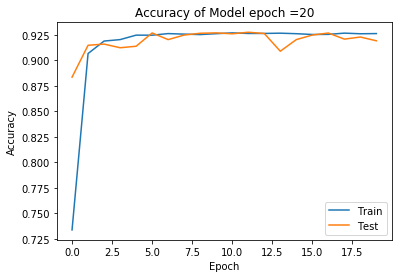

In [85]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy of Model epoch =20')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('accuracy.png')
plt.show()

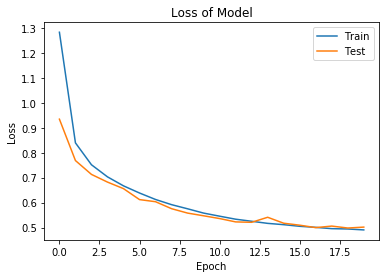

In [86]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.savefig('loss.png')
plt.show()

In [87]:
history.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 11)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 12        
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


In [88]:
#使用模型进行预测
mlp_pred = history.model.predict(X_test, verbose = 0)
mlp_class = history.model.predict_classes(X_test, verbose = 0)

In [89]:
mlp_pred

array([[0.2614246 , 0.7385754 ],
       [0.00638715, 0.9936128 ],
       [0.9666758 , 0.03332416],
       ...,
       [0.9091387 , 0.09086134],
       [0.91861105, 0.08138897],
       [0.9666758 , 0.03332416]], dtype=float32)

In [90]:
mlp_class

array([1, 1, 0, ..., 0, 0, 0])

In [91]:
accuracy =accuracy_score(y_test, mlp_class)

In [92]:
precision =precision_score(y_test, mlp_class)

In [93]:
recall =recall_score(y_test, mlp_class)

In [94]:
f1_score =f1_score(y_test, mlp_class)

In [95]:
fpr_mlp, tpr_mlp, thrsholds_mlp =roc_curve(y_test, history.model.predict_proba(X_test)[:,1])

scores:0.852 
the f1_score of  KNN: 0.8542154246782638
the precision_score of KNN: 0.8584042966664888
the recall_score of KNN: 0.8549146178836926


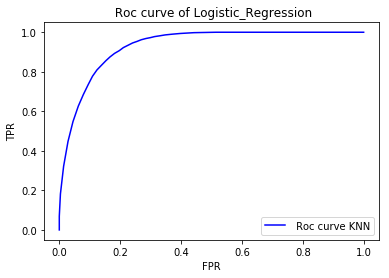

auc of KNN 0.9306489828771047


In [99]:
%run K_Nearest_Neighbors.ipynb

/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


运行时间: 4.331586 s
the f1_score of LogisticRegression: 0.8525745238182529
the precision_score of LogisticRegression: 0.8578375441023651
the recall_score of LogisticRegression: 0.8527382800943514


/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


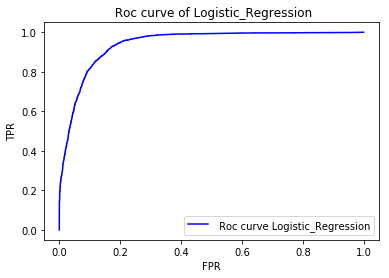

auc of Logistic_Regression 0.9405661644295041


In [100]:
%run Logistic_Regression.ipynb

/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


运行时间: 82.35565805 s


/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


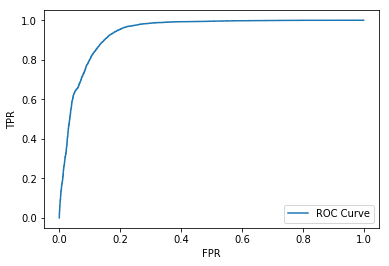

auc of SVM 0.938900123905148


/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


f1 socre of SVM: 0.8455264458724666
precison of SVM: 0.8856957928802589
recall of SVM: 0.8088426527958388
              precision    recall  f1-score   support

      falied       0.83      0.90      0.86      8588
  successful       0.89      0.81      0.85      8459

   micro avg       0.85      0.85      0.85     17047
   macro avg       0.86      0.85      0.85     17047
weighted avg       0.86      0.85      0.85     17047



In [110]:
%run SVM.ipynb

/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


运行时间: 0.141262 s
scores:0.8520998252536692
acc of rf: 0.8520998252536692
运行时间: 0.093872 s
rf accurcy: 0.8953481551006042
dct accurcy: 0.9004516923798909
Random Forest [[7932  512]
 [1272 7331]]
Decision Tree [[7542  902]
 [ 795 7808]]


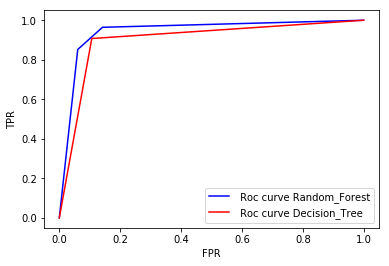

auc of decision_tree: 0.9003844818985898
auc of random_forest: 0.9424352468565353
rf precision: 0.9347188575800076
rf recall: 0.8521446007206789
rf f1: 0.8915237747780616
dt precision: 0.8964408725602755
dt recall: 0.9075903754504243
dt f1: 0.9019811702189108


In [112]:
%run Random_Forest.ipynb

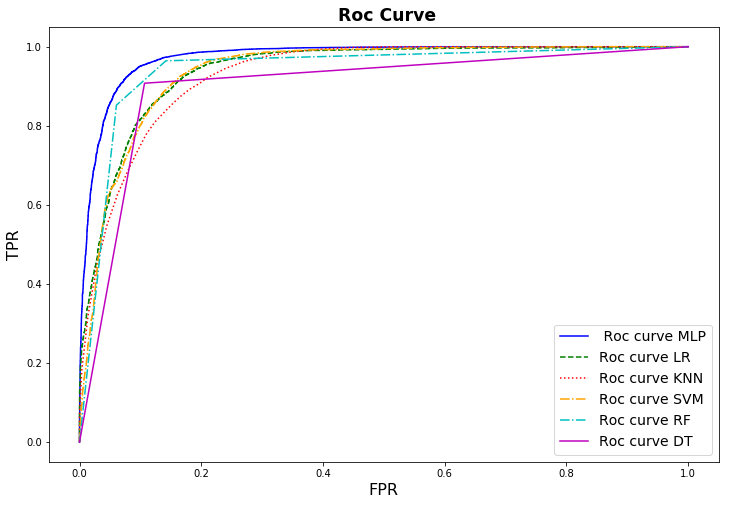

In [138]:
plt.figure(figsize=(12,8))
plt.plot(fpr_mlp, tpr_mlp, label =' Roc curve MLP', linestyle='-',color='b')
plt.plot(fpr_lr, tpr_lr, label ='Roc curve LR',linestyle='--',color ='g')
plt.plot(fpr_knn, tpr_knn, label ='Roc curve KNN', linestyle=':',color ='r')
plt.plot(fpr_svm, tpr_svm, label='Roc curve SVM', linestyle='-.', color='#FFA500')
plt.plot(fpr_rf, tpr_rf, label='Roc curve RF', linestyle ='-.',color ='c')
plt.plot(fpr_dct, tpr_dct, label ='Roc curve DT', linestyle='-', color ='m')
plt.xlabel('FPR',fontsize=16)
plt.ylabel('TPR',fontsize=16)
plt.title(' Roc Curve',fontsize ='xx-large',fontweight='bold')
# plt.plot(fpr[close_zero], tpr[close_zero], 'o', marksize =10, label ='thrshold zero rf', fillstyle = 'none', c ='k', mew =2)
plt.legend(loc =4,fontsize=14)
plt.savefig('Roc.png')

In [97]:
auc =auc(fpr_mlp, tpr_mlp)

In [98]:
print('Accuracy of MLP:', accuracy)
print('Precision of MLP:', precision)
print('Recall of MLP:', recall)
print('F1_scores of MLP:', f1_score)
print('Auc of MLP:', auc)

Accuracy of MLP: 0.9192233237519798
Precision of MLP: 0.8831421770179615
Recall of MLP: 0.9648894668400521
F1_scores of MLP: 0.9222077848709113
Auc of MLP: 0.9736320878267969


In [42]:
matrix =confusion_matrix(y_test, mlp_class)

In [43]:
matrix

array([[7809,  779],
       [ 643, 7816]])